# Comparing Homophilic Affinity in Connectomes Across Taxa

In this notebook, we will analyze the homophilia of most of the connectomes in Connectocross. We will plot the adjacency matrices and the nodes in 3d space to visualize the homophilic character of these connectomes.

In [2]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib notebook <-- Uncomment this and comment the line above, then open Jupyter notebook in browser for interactive 3D plots

import seaborn as sns
sns.set(font_scale=1.75)
sns.set_style("white")

# Palettes for edges and nodes
node_palette = sns.color_palette("deep")
edge_palette = sns.color_palette("bright")
worm_palette = sns.color_palette("dark")

import random
np.random.seed(10)

In [3]:
from grapgh_io import GraphIO

ciona, ciona_e_att, ciona_n_att, ciona_g_att  = GraphIO.load('../json_connectomes/ciona.json')
fafb, fafb_e_att, fafb_n_att, fafb_g_att = GraphIO.load('../json_connectomes/fafb.json')
worm, worm_e_att, worm_n_att, worm_g_att = GraphIO.load('../json_connectomes/worm_wiring_connectome_0_SL.json')

wit_0, wit_0_e_att, wit_0_n_att, wit_0_g_att = GraphIO.load('../json_connectomes/witvilet/0.json')
wit_1, wit_1_e_att, wit_1_n_att, wit_1_g_att = GraphIO.load('../json_connectomes/witvilet/1.json')
wit_2, wit_2_e_att, wit_2_n_att, wit_2_g_att = GraphIO.load('../json_connectomes/witvilet/2.json')
wit_3, wit_3_e_att, wit_3_n_att, wit_3_g_att = GraphIO.load('../json_connectomes/witvilet/3.json')
wit_4, wit_4_e_att, wit_4_n_att, wit_4_g_att = GraphIO.load('../json_connectomes/witvilet/4.json')
wit_5, wit_5_e_att, wit_5_n_att, wit_5_g_att = GraphIO.load('../json_connectomes/witvilet/5.json')
wit_6, wit_6_e_att, wit_6_n_att, wit_6_g_att = GraphIO.load('../json_connectomes/witvilet/6.json')
wit_7, wit_7_e_att, wit_7_n_att, wit_7_g_att = GraphIO.load('../json_connectomes/witvilet/7.json')

L = list(worm.edges)
L0 = []
L1 = []
L2 = []

for i in L:
    if i[-1] == 0:
        L0.append(i)
    elif i[-1] == 1:
        L1.append(i)
    elif i[-1] == 2:
        L2.append(i)

worm_0 = worm.edge_subgraph(L0)
worm_1 = worm.edge_subgraph(L1)
worm_2 = worm.edge_subgraph(L2)

## Determine Homophilia for Each Edge

In the context of nanoscale connectomics, an edge defines a synaptic connection between two neurons. These connections constitute the edges in our graphs. We define a homophilic edge as a connection between two neurons in the same hemisphere of the brain. Below, we will label every edge in each graph as either homophilic or not.

In [4]:
def homophilic_att(graph, name):

    if name == 'ciona' or name == 'fafb':
        for key in graph.edges:
            try:
                if graph.nodes[key[0]]['Side'] == graph.nodes[key[1]]['Side']:
                    graph.edges[key]['Homophilic'] = True
                else:
                    graph.edges[key]['Homophilic'] = False
            except:
                continue

    elif name == 'worm':
        for key in graph.edges:
            try:
                if graph.nodes[key[0]]['attr_dict']['hemisphere'] == graph.nodes[key[1]]['attr_dict']['hemisphere']:
                    graph.edges[key]['Homophilic'] = True
                else:
                    graph.edges[key]['Homophilic'] = False
            except:
                continue

    elif name == 'wit':
        for key in graph.edges:
            try:
                if graph.nodes[key[0]]['hemisphere'] == graph.nodes[key[1]]['hemisphere']:
                    graph.edges[key]['Homophilic'] = True
                else:
                    graph.edges[key]['Homophilic'] = False
            except:
                continue

homophilic_att(ciona, 'ciona')

homophilic_att(worm_0, 'worm')
homophilic_att(worm_1, 'worm')
homophilic_att(worm_2, 'worm')

homophilic_att(wit_0, 'wit')
homophilic_att(wit_1, 'wit')
homophilic_att(wit_2, 'wit')
homophilic_att(wit_3, 'wit')
homophilic_att(wit_4, 'wit')
homophilic_att(wit_5, 'wit')
homophilic_att(wit_6, 'wit')
homophilic_att(wit_7, 'wit')

homophilic_att(fafb, 'fafb')

## Find Neuron Coordinates for Plotting

In order to create 3d plots of the neurons and edges in space, we need to find the coordinates in the graph metadata. This is currently only possible for the Ciona and FAFB connectomes. Also, for every graph we need to assign each node a label indicating on what side of the brain they are located. If this information is not available, the appropriate value is assigned.

In [5]:
def find_nodes(graph, name):
    '''
    Finds nodes in graph object that have coordinate annotations. Assign every node a "hemisphere" or "side" value.
    '''
    nodes_w_coors = []
    positions_axial = {}
    positions_coronal = {}
    for key in graph.nodes:
        if name == 'ciona':
            try:
                if graph.nodes[key]['Side'] != '-':
                    if graph.nodes[key]['X'] != '-':
                        nodes_w_coors.append(key)
                        positions_axial[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Y']])
                        positions_coronal[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Z']])
                if graph.nodes[key]['Side'] == '-':
                    graph.nodes[key]['Side'] = False
            
            except:
                graph.nodes[key]['Side'] = False
            
        elif name == 'fafb':
            try:
                if graph.nodes[key]['Side'] != False:
                    if graph.nodes[key]['X'] != False:
                        nodes_w_coors.append(key)
                        positions_axial[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Y']])
                        positions_coronal[key] = np.asarray([graph.nodes[key]['X'], graph.nodes[key]['Z']])

            except:
                graph.nodes[key]['Side'] = False

        elif name == 'worm':
            try:
                if graph.nodes[key]['attr_dict']['hemisphere'] != None:
                    continue
                if graph.nodes[key]['attr_dict']['hemisphere'] == None:
                    continue
            except:
                graph.nodes[key]['attr_dict']['hemisphere'] = None

        elif name == 'wit':
            try:
                if graph.nodes[key]['hemisphere'] != None:
                    continue
                if graph.nodes[key]['hemisphere'] == None:
                    continue
            except:
                graph.nodes[key]['hemisphere'] = None
            

    return nodes_w_coors, positions_axial, positions_coronal


ciona_coor_nodes, ciona_ax_coors, ciona_co_coors = find_nodes(ciona, 'ciona')

fafb_coor_nodes, fafb_ax_coors, fafb_co_coors = find_nodes(fafb, 'fafb')

_, _, _ = find_nodes(worm_0, 'worm')
_, _, _ = find_nodes(worm_1, 'worm')
_, _, _ = find_nodes(worm_2, 'worm')

_, _, _ = find_nodes(wit_0, 'wit')
_, _, _ = find_nodes(wit_1, 'wit')
_, _, _ = find_nodes(wit_2, 'wit')
_, _, _ = find_nodes(wit_3, 'wit')
_, _, _ = find_nodes(wit_4, 'wit')
_, _, _ = find_nodes(wit_5, 'wit')
_, _, _ = find_nodes(wit_6, 'wit')
_, _, _ = find_nodes(wit_7, 'wit')

## Filter Nodes

We can calculate homophilic affinity only for nodes which known hemisphere location. Thus, we need to filter these out.

In [6]:
def filter_nodes(graph, name):
    left_nodes = []
    right_nodes = []

    if name == 'ciona' or name == 'fafb':
        for i in graph.nodes:
            if graph.nodes[i]['Side'] == 'L':
                left_nodes.append(i)
            elif graph.nodes[i]['Side'] == 'R':
                right_nodes.append(i) 
    
    if name == 'worm':
        for i in graph.nodes:
            if graph.nodes[i]['attr_dict']['hemisphere'] == 'left':
                left_nodes.append(i)
            elif graph.nodes[i]['attr_dict']['hemisphere'] == 'right':
                right_nodes.append(i)

    if name == 'wit':
        for i in graph.nodes:
            if graph.nodes[i]['hemisphere'] == 'left':
                left_nodes.append(i)
            elif graph.nodes[i]['hemisphere'] == 'right':
                right_nodes.append(i)

    nodes_order = left_nodes + right_nodes
    graph_new = graph.subgraph(nodes_order)

    return graph_new

ciona_filter = filter_nodes(ciona, 'ciona')

worm_0_filter = filter_nodes(worm_0, 'worm')
worm_1_filter = filter_nodes(worm_1, 'worm')
worm_2_filter = filter_nodes(worm_2, 'worm')

wit_0_filter = filter_nodes(wit_0, 'wit')
wit_1_filter = filter_nodes(wit_1, 'wit')
wit_2_filter = filter_nodes(wit_2, 'wit')
wit_3_filter = filter_nodes(wit_3, 'wit')
wit_4_filter = filter_nodes(wit_4, 'wit')
wit_5_filter = filter_nodes(wit_5, 'wit')
wit_6_filter = filter_nodes(wit_6, 'wit')
wit_7_filter = filter_nodes(wit_7, 'wit')

fafb_filter = filter_nodes(fafb, 'fafb')

## Calculating Homophilic Affinity Using Fisher's Exact Test and Plotting Communities

In [8]:
from graspologic.plot import matrixplot
import pandas as pd

def worm_adj(graph):

    worm_sides = []
    hemi_sg = []
    for i in graph.nodes:
        try:
            worm_sides.append(graph.nodes[i]['attr_dict']['hemisphere'])
            if graph.nodes[i]['attr_dict']['hemisphere'] != None:
                hemi_sg.append(i)
        except:
            worm_sides.append(None)

    worm_sides = np.asarray(worm_sides)

    worm_sides = np.delete(worm_sides, np.where(worm_sides == None))

    meta = pd.DataFrame(
        data={
            'Hemisphere': worm_sides},
    )

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matrixplot(
        data=nx.to_numpy_array(graph.subgraph(hemi_sg)),
        ax=ax,
        col_meta=meta,
        row_meta=meta,
        plot_type="heatmap",
        col_group=["Hemisphere"],
        row_group=["Hemisphere"],
        col_item_order=["Hemisphere"],
        row_item_order=["Hemisphere"],
    )

    plt.show()

def wit_adj(graph):

    worm_sides = []
    hemi_sg = []
    for i in graph.nodes:
        try:
            worm_sides.append(graph.nodes[i]['hemisphere'])
            if graph.nodes[i]['hemisphere'] != None:
                hemi_sg.append(i)
        except:
            worm_sides.append(None)

    worm_sides = np.asarray(worm_sides)

    worm_sides = np.delete(worm_sides, np.where(worm_sides == None))

    meta = pd.DataFrame(
        data={
            'Hemisphere': worm_sides},
    )

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matrixplot(
        data=nx.to_numpy_array(graph.subgraph(hemi_sg)),
        ax=ax,
        col_meta=meta,
        row_meta=meta,
        plot_type="heatmap",
        col_group=["Hemisphere"],
        row_group=["Hemisphere"],
        col_item_order=["Hemisphere"],
        row_item_order=["Hemisphere"],
    )

    plt.show()

def ciona_adj(graph):

    all_sg = []
    side_sg = []
    all_vals = []
    side_vals = []
    for i in graph.nodes:
        try:
            all_vals.append(graph.nodes[i]['Side'])
            all_sg.append(i)
            if graph.nodes[i]['Side'] == "R" or graph.nodes[i]['Side'] == "L":
                side_vals.append(graph.nodes[i]['Side'])
                side_sg.append(i)
        except:
            continue

    all_vals = np.asarray(all_vals)
    side_vals = np.asarray(side_vals)

    meta = pd.DataFrame(
        data={
            'Hemisphere': side_vals},
    )

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matrixplot(
        data=nx.to_numpy_array(graph.subgraph(side_sg)),
        ax=ax,
        col_meta=meta,
        row_meta=meta,
        plot_type="heatmap",
        col_group=["Hemisphere"],
        row_group=["Hemisphere"],
        col_item_order=["Hemisphere"],
        row_item_order=["Hemisphere"],
        col_ticks=False,
    )

    plt.show()

def fafb_adj(graph):

    all_sg = []
    all_vals = []
    for i in graph.nodes:
        try:
            if graph.nodes[i]['Side'] != False:
                all_vals.append(graph.nodes[i]['Side'])
                all_sg.append(i)
        except:
            continue

    all_vals = np.asarray(all_vals)

    meta = pd.DataFrame(
        data={
            'Hemisphere': all_vals},
    )

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    matrixplot(
        data=nx.to_numpy_array(graph.subgraph(all_sg)),
        ax=ax,
        col_meta=meta,
        row_meta=meta,
        plot_type="heatmap",
        col_group=["Hemisphere"],
        row_group=["Hemisphere"],
        col_item_order=["Hemisphere"],
        row_item_order=["Hemisphere"],
        col_ticks=False,
    )

    meta = pd.DataFrame(
        data={
            'Side': all_vals},
    )


### FAFB

In [13]:
from scipy.stats import fisher_exact

homophilic_edge = 0
heterophilic_edge = 0
homophilic_no_edge = 0
heterophilic_no_edge = 0
G = fafb_filter
for i in G.nodes:
    for j in G.nodes:
        if (i, j) in G.edges:
            if G.edges[(i, j)]['Homophilic']:
                homophilic_edge += 1
            else:
                heterophilic_edge += 1
        else:
            if G.nodes[i]['Side'] == G.nodes[j]['Side']:
                homophilic_no_edge += 1
            else:
                heterophilic_no_edge += 1
                
con_table = np.zeros((2, 2))
con_table[0, 0] = 100*(homophilic_no_edge / (homophilic_no_edge + homophilic_edge))
con_table[1, 0] = 100*(heterophilic_no_edge / (heterophilic_no_edge + heterophilic_edge))
con_table[0, 1] = 100*(homophilic_edge / (homophilic_no_edge + homophilic_edge))
con_table[1, 1] = 100*(heterophilic_edge / (heterophilic_no_edge + heterophilic_edge))

#fafb_adj(fafb_filter) <-- Uncomment this to see adjacency matrix

con_table = pd.DataFrame(con_table, columns=["No Edge", "Edge"], index=["Within Hem.", "Between Hem."])

print(con_table)
print("Statistic: {}".format(fisher_exact(con_table)[0]))
print("P-Value: {}".format(fisher_exact(con_table)[1]))

                No Edge      Edge
Within Hem.   94.895833  5.104167
Between Hem.  94.401042  5.598958
Statistic: 1.0
P-Value: 1.0


### Ciona

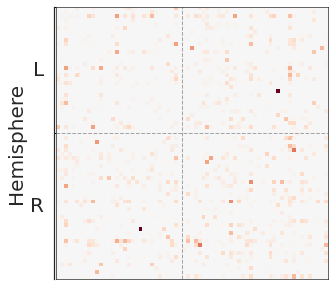

                No Edge       Edge
Within Hem.   73.631425  26.368575
Between Hem.  91.554054   8.445946
Statistic: 0.24683009298393913
P-Value: 0.0011187535725873015


In [14]:
from scipy.stats import fisher_exact

homophilic_edge = 0
heterophilic_edge = 0
homophilic_no_edge = 0
heterophilic_no_edge = 0

G = ciona_filter
for i in G.nodes:
    for j in G.nodes:
        if (i, j) in G.edges:
            if G.edges[(i, j)]['Homophilic']:
                homophilic_edge += 1
            else:
                heterophilic_edge += 1
        else:
            if G.nodes[i]['Side'] == G.nodes[j]['Side']:
                homophilic_no_edge += 1
            else:
                heterophilic_no_edge += 1
                
con_table = np.zeros((2, 2))
con_table[0, 0] = 100*(homophilic_no_edge / (homophilic_no_edge + homophilic_edge))
con_table[1, 0] = 100*(heterophilic_no_edge / (heterophilic_no_edge + heterophilic_edge))
con_table[0, 1] = 100*(homophilic_edge / (homophilic_no_edge + homophilic_edge))
con_table[1, 1] = 100*(heterophilic_edge / (heterophilic_no_edge + heterophilic_edge))

ciona_adj(ciona_filter)

con_table = pd.DataFrame(con_table, columns=["No Edge", "Edge"], index=["Within Hem.", "Between Hem."])

print(con_table)
print("Statistic: {}".format(fisher_exact(con_table)[0]))
print("P-Value: {}".format(fisher_exact(con_table)[1]))

### Worm

In [11]:
from scipy.stats import fisher_exact

def calc_worm(G, n):
    homophilic_edge = 0
    heterophilic_edge = 0
    homophilic_no_edge = 0
    heterophilic_no_edge = 0
    for i in G.nodes:
        for j in G.nodes:
            if (i, j, n) in G.edges:
                if G.edges[(i, j, n)]['Homophilic']:
                    homophilic_edge += 1
                else:
                    heterophilic_edge += 1
            else:
                if G.nodes[i]['attr_dict']['hemisphere'] == G.nodes[j]['attr_dict']['hemisphere']:
                    homophilic_no_edge += 1
                else:
                    heterophilic_no_edge += 1
                
    con_table = np.zeros((2, 2))
    con_table[0, 0] = 100*(homophilic_no_edge / (homophilic_no_edge + homophilic_edge))
    con_table[1, 0] = 100*(heterophilic_no_edge / (heterophilic_no_edge + heterophilic_edge))
    con_table[0, 1] = 100*(homophilic_edge / (homophilic_no_edge + homophilic_edge))
    con_table[1, 1] = 100*(heterophilic_edge / (heterophilic_no_edge + heterophilic_edge))

    #worm_adj(worm_0_filter)

    con_table = pd.DataFrame(con_table, columns=["No Edge", "Edge"], index=["Within Hem.", "Between Hem."])

    print(con_table)
    print("Statistic: {}".format(fisher_exact(con_table)[0]))
    print("P-Value: {}".format(fisher_exact(con_table)[1]))

calc_worm(worm_0_filter, 0)
calc_worm(worm_1_filter, 1)
calc_worm(worm_2_filter, 2)

                No Edge      Edge
Within Hem.   97.158514  2.841486
Between Hem.  97.358107  2.641893
Statistic: 1.0
P-Value: 1.0
                No Edge      Edge
Within Hem.   99.056619  0.943381
Between Hem.  99.571429  0.428571
Statistic: nan
P-Value: 1.0
                No Edge      Edge
Within Hem.   98.126526  1.873474
Between Hem.  99.142857  0.857143
Statistic: 0.0
P-Value: 1.0


### Witvliet

In [15]:
from scipy.stats import fisher_exact

def calc_wit(G, n):
    homophilic_edge = 0
    heterophilic_edge = 0
    homophilic_no_edge = 0
    heterophilic_no_edge = 0
    for i in G.nodes:
        for j in G.nodes:
            if (i, j, n) in G.edges:
                if G.edges[(i, j, n)]['Homophilic']:
                    homophilic_edge += 1
                else:
                    heterophilic_edge += 1
            else:
                if G.nodes[i]['hemisphere'] == G.nodes[j]['hemisphere']:
                    homophilic_no_edge += 1
                else:
                    heterophilic_no_edge += 1
                
    con_table = np.zeros((2, 2))
    con_table[0, 0] = 100*(homophilic_no_edge / (homophilic_no_edge + homophilic_edge))
    con_table[1, 0] = 100*(heterophilic_no_edge / (heterophilic_no_edge + heterophilic_edge))
    con_table[0, 1] = 100*(homophilic_edge / (homophilic_no_edge + homophilic_edge))
    con_table[1, 1] = 100*(heterophilic_edge / (heterophilic_no_edge + heterophilic_edge))

    #wit_adj(G)

    con_table = pd.DataFrame(con_table, columns=["No Edge", "Edge"], index=["Within Hem.", "Between Hem."])

    print(con_table)
    print("Statistic: {}".format(fisher_exact(con_table)[0]))
    print("P-Value: {}".format(fisher_exact(con_table)[1]))

calc_wit(wit_0_filter, 0)
calc_wit(wit_1_filter, 0)
calc_wit(wit_2_filter, 0)
calc_wit(wit_3_filter, 0)
calc_wit(wit_4_filter, 0)
calc_wit(wit_5_filter, 0)
calc_wit(wit_6_filter, 0)
calc_wit(wit_7_filter, 0)

                No Edge      Edge
Within Hem.   97.166120  2.833880
Between Hem.  98.049242  1.950758
Statistic: 0.49489795918367346
P-Value: 1.0
                No Edge      Edge
Within Hem.   96.627289  3.372711
Between Hem.  97.689944  2.310056
Statistic: 0.6597938144329897
P-Value: 1.0
                No Edge      Edge
Within Hem.   96.780695  3.219305
Between Hem.  97.793953  2.206047
Statistic: 0.6597938144329897
P-Value: 1.0
                No Edge      Edge
Within Hem.   96.292791  3.707209
Between Hem.  97.548401  2.451599
Statistic: 0.6597938144329897
P-Value: 1.0
                No Edge      Edge
Within Hem.   95.245475  4.754525
Between Hem.  96.994699  3.005301
Statistic: 0.7421875
P-Value: 1.0
                No Edge      Edge
Within Hem.   95.708094  4.291906
Between Hem.  97.241867  2.758133
Statistic: 0.4896907216494845
P-Value: 0.6826672709211845
                No Edge      Edge
Within Hem.   94.150356  5.849644
Between Hem.  96.140491  3.859509
Statistic: 0.5875
P-V

## Visualizing Homophilia in 3d

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

def network_plot_3D(G, node_color, edge_color):
    
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(7,7))
        ax = Axes3D(fig)
        
        # Plot nodes
        for key in G.nodes:
            xi = G.nodes[key]['X']
            yi = G.nodes[key]['Y']
            zi = G.nodes[key]['Z']

            ax.scatter(xi, yi, zi, c=node_color, edgecolors='k', alpha=0.7)

        # Get starting and ending points for each edge
        for i,j in enumerate(G.edges()):
            x = np.array((G.nodes[j[0]]['X'], G.nodes[j[1]]['X']))
            y = np.array((G.nodes[j[0]]['Y'], G.nodes[j[1]]['Y']))
            z = np.array((G.nodes[j[0]]['Z'], G.nodes[j[1]]['Z']))
        
        # Plot the edges as lines
            ax.plot(x, y, z, c=edge_color, alpha=0.1)

        # Legend
        colors = [tuple(node_color[0]), edge_color]
        texts = ["Soma", "Synapse"]
        mkrs = ["o", "_"]
        patches = [ plt.plot([],[], marker=mkrs[i], ms=10, ls="", mec=None, color=colors[i], label="{:s}".format(texts[i]) )[0] for i in range(len(texts)) ]
        
        ax.legend(handles=patches, loc=1)

def homophilic_plot_3D(G, node_color, edge_colors):
    
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(7,7))
        ax = Axes3D(fig)

        for key in G.nodes:
            xi = G.nodes[key]['X']
            yi = G.nodes[key]['Y']
            zi = G.nodes[key]['Z']

            ax.scatter(xi, yi, zi, c=node_color, edgecolors='k', alpha=0.7)

        count = 0
        for i,j in enumerate(G.edges()):
            x = np.array((G.nodes[j[0]]['X'], G.nodes[j[1]]['X']))
            y = np.array((G.nodes[j[0]]['Y'], G.nodes[j[1]]['Y']))
            z = np.array((G.nodes[j[0]]['Z'], G.nodes[j[1]]['Z']))

            # Plot edges, but each is color-coded specifically according to subtype
            ax.plot(x, y, z, c=edge_colors[count], alpha=0.1)
            
            count += 1
            
        colors = [tuple(node_color[0]), list(set(edge_colors))[1], list(set(edge_colors))[0]]
        texts = ["Soma", "Homophilic", "Heterophilic"]
        mkrs = ["o", "_", "_"]
        patches = [ plt.plot([],[], marker=mkrs[i], ms=10, ls="", mec=None, color=colors[i], label="{:s}".format(texts[i]) )[0] for i in range(len(texts)) ]
        
        ax.legend(handles=patches, loc=1)

### Ciona

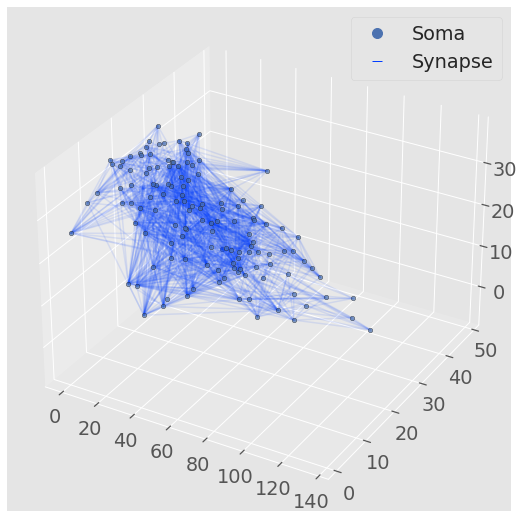

In [17]:
edge_color = edge_palette[0]
node_color = np.asarray(node_palette[0]).reshape((1,3))
network_plot_3D(ciona.subgraph(ciona_coor_nodes), node_color, edge_color)

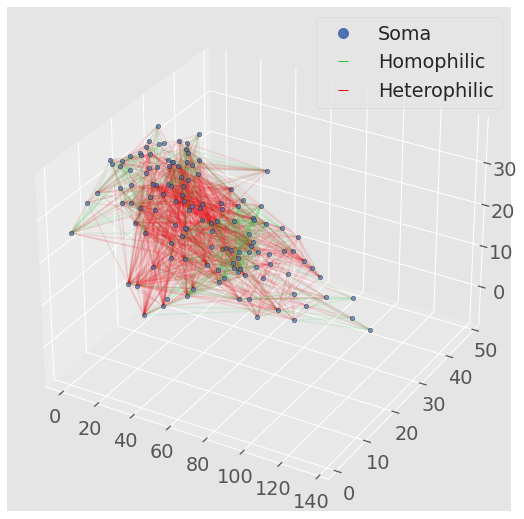

In [18]:
node_colors = []
edge_colors = []
for line in nx.generate_edgelist(ciona.subgraph(ciona_coor_nodes), data=False):
    edge = []
    edge.append(line.rsplit(' ', 1)[0])
    edge.append(line.rsplit(' ', 1)[1])
    edge = tuple(edge)
    
    if ciona.subgraph(ciona_coor_nodes).edges[edge]['Homophilic']:
        edge_colors.append(edge_palette[2])
    else:
        edge_colors.append(edge_palette[3])

node_color = np.asarray(node_palette[0]).reshape((1,3))

homophilic_plot_3D(ciona.subgraph(ciona_coor_nodes), node_color, edge_colors)

In [19]:
edge_colors = []
for line in nx.generate_edgelist(fafb.subgraph(fafb_coor_nodes), data=False):
    edge = []
    edge.append(int(line.rsplit(' ', 1)[0]))
    edge.append(int(line.rsplit(' ', 1)[1]))
    edge = tuple(edge)
    
    if fafb.subgraph(fafb_coor_nodes).edges[edge]['Homophilic']:
        edge_colors.append(edge_palette[2])
    else:
        edge_colors.append(edge_palette[3])

node_color = np.asarray(node_palette[1]).reshape((1,3))

#homophilic_plot_3D(fafb.subgraph(fafb_coor_nodes), node_color, edge_colors)

## References

```{bibliography}
:style: unsrt
```